In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer,f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC

## we will read the two csv files . and add a label for each one to just identify them when merging . to make the calculation on the file  . and split the target from the train data 

In [2]:
df = pd.read_csv('train.csv')
train = df.iloc[: , :-1]
train['label'] = '11'
target = df['Loan_Status']
test = pd.read_csv('test.csv')
test['label'] = '22'

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## combine the two datasets together and reset the  index for them 

In [4]:
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)

### look at the columns to identify the class type and number of null values on each one if exist , the number of rows and columns on the total data set 

In [5]:
combined.info()
combined.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
label                981 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 92.0+ KB


(981, 12)

In [9]:
combined.describe()## describe only show the numeric values of the dataset . wh will see later the total dataset after the encoding 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
## count the null values of each of the columns 
combined.isna().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
label                 0
dtype: int64

In [12]:
combined.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'label'],
      dtype='object')

### replace the Gender column with the most frequent value "male"

In [13]:
combined['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [14]:
combined['Gender'] = combined['Gender'].fillna(value='Male')

In [ ]:
### replace the Married column with the most frequent value "Yes"

In [15]:
combined['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [16]:
combined['Married'] = combined['Married'].fillna(value='Yes')

In [ ]:
### replace the Dependents column with the most frequent value "0"

In [17]:
combined['Dependents'].value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [18]:
combined['Dependents'] = combined['Dependents'].fillna(value='0')


### replace the Self_Employed column with the most frequent value "NO"

In [19]:
combined['Self_Employed'] = combined['Self_Employed'].fillna(value='No')

### replace the LoanAmount column with the mean  value "129"

In [20]:
combined['LoanAmount'] = combined['LoanAmount'].fillna(value=129)

### replace the Loan_Amount_Term column with the mean value "360"

In [21]:
combined['Loan_Amount_Term'] = combined['Loan_Amount_Term'].fillna(value=360)


### replace the Credit_History column with the most frequent  value "360"

In [22]:
combined['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [24]:
combined['Credit_History'] = combined['Credit_History'].fillna(value=1)


In [25]:
combined.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
label                0
dtype: int64

### perform some visualization to understand the data 

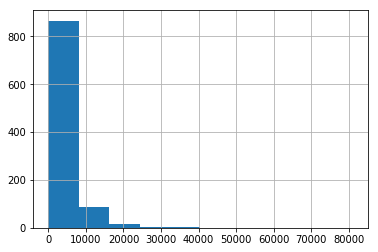

In [26]:
combined['ApplicantIncome'].hist()
#plt.show()

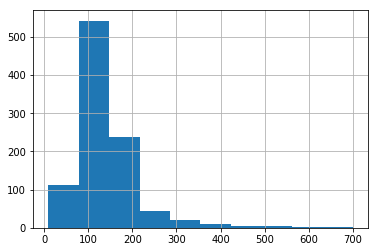

In [27]:
combined['LoanAmount'].hist()

### perform label encoding to tranform all objects columns to numeric ones for more caculations  and more analytics 

In [30]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
combined['Gender'] = l1.fit_transform(combined['Gender'])
l2 = LabelEncoder()
combined['Married'] = l2.fit_transform(combined['Married'])
l3 = LabelEncoder()
combined['Education'] = l3.fit_transform(combined['Education'])
l4 = LabelEncoder()
combined['Self_Employed'] = l4.fit_transform(combined['Self_Employed'])
l5 = LabelEncoder()
combined['Property_Area'] = l5.fit_transform(combined['Property_Area'])

l_label = LabelEncoder()
target = l5.fit_transform(target)

In [31]:
def change_to_int(x):
    if x == '3+':
        return 3
    else:
        return int(x)

combined['Dependents'] = combined['Dependents'].map(change_to_int )

In [32]:
combined.info()
# as shown below all columns transformed to numeric ones with no missing values  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
Gender               981 non-null int64
Married              981 non-null int64
Dependents           981 non-null int64
Education            981 non-null int64
Self_Employed        981 non-null int64
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Credit_History       981 non-null float64
Property_Area        981 non-null int64
label                981 non-null object
dtypes: float64(4), int64(7), object(1)
memory usage: 92.0+ KB


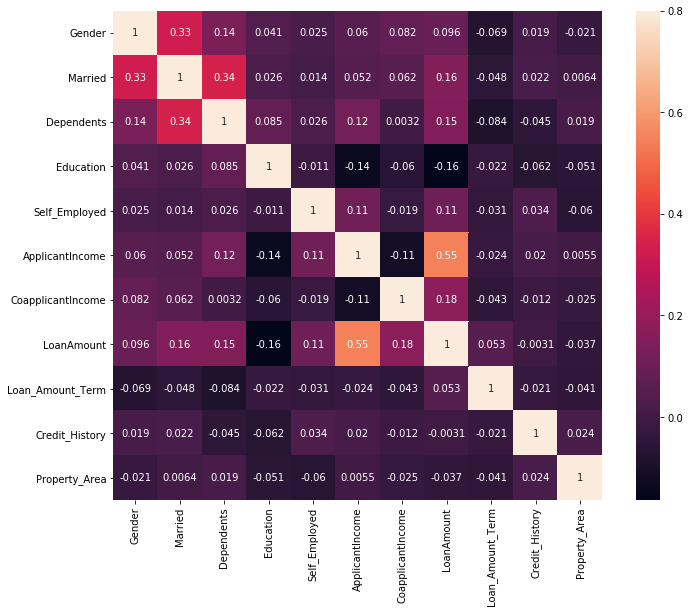

In [33]:
corrmat = combined.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cbar=True, annot=True, square=True, vmax=.8);

### as we show above the most correlated columns on the dataset are (Applicationincome , loanamount)
### as we show above the little correlated columns on the dataset are (Married  , Dependents , Gender)

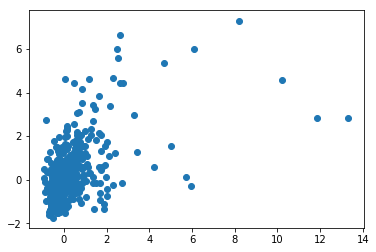

In [70]:
plt.scatter(combined['ApplicantIncome'], combined['LoanAmount'])

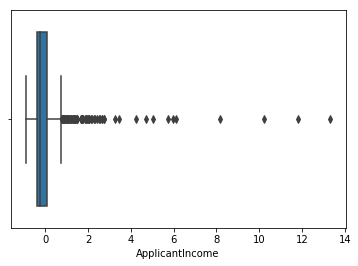

In [73]:
sns.boxplot(x=combined['ApplicantIncome'])
# wh should remove ApplicantIncome > 6 as these shown as outliers

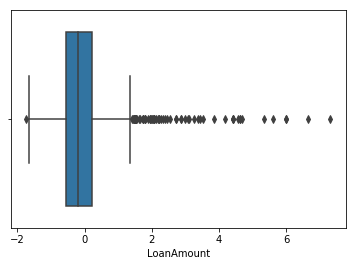

In [74]:
sns.boxplot(x=combined['LoanAmount'])
# wh should remove LoanAmount > 4 as these shown as outliers

### perform standardScalar to make all columns on the same scale . and remove the influence of larger scale columns 

In [34]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
combined.iloc[:,:-1] = sc.fit_transform(combined.iloc[:,:-1])
## split the last column as the label one 

In [35]:
from sklearn.model_selection import train_test_split
x = combined[combined['label']=='11'].iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8150851581508516

In [67]:
from sklearn.svm import SVC
clf = SVC(kernel= 'rbf' )
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8345498783454988

In [56]:
y_pred = clf.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 33,  39],
       [  2, 129]], dtype=int64)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8272506082725061

### RandomForestClassifier can give us the most accurate resuts but it almost lead us to overfitting the results as shown below on the confusion_matrix results \

In [64]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 3)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9318734793187348

In [62]:
y_pred = clf.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 39,  33],
       [ 18, 113]], dtype=int64)

### as shown above the most accurate alogorithms are the RandomForestClassifier , SVC
### we will export the result from SVC as most accurate results on confusion_matrix

In [65]:
test_data = combined[combined['label']=='22'].iloc[:,:-1]

In [68]:
test_result = pd.DataFrame()
test_result['Loan_ID']  =test["Loan_ID"]
test_result['Loan_Status'] = clf.predict(test_data)
test_result.to_csv("Sample_Submission.csv",index=False)

In [51]:
len(test["Loan_ID"])

367

In [66]:
len(test_data)

367